In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
cifer = tf.keras.datasets.cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifer.load_data()

In [4]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

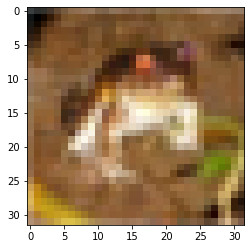

In [5]:
plt.imshow(X_train[0])

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
datagen = ImageDataGenerator(rotation_range=30,zoom_range=0.1,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)

In [9]:
train_data = datagen.flow(X_train,y_train,batch_size=64)
test_data = datagen.flow(X_test,y_test,batch_size=64)

In [10]:
# creation of model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,BatchNormalization

model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))        
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))         
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())
          
model.add(Dense(512,'relu',))
          
# Adding output layer
model.add(Dense(10,'softmax'))
          
model.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(train_data,validation_data=test_data,epochs=25)

Epoch 1/25
782/782 [==============================] - 376s 478ms/step - loss: 1.6277 - accuracy: 0.4130 - val_loss: 1.7723 - val_accuracy: 0.3993
Epoch 2/25
782/782 [==============================] - 369s 472ms/step - loss: 1.2564 - accuracy: 0.5545 - val_loss: 1.2700 - val_accuracy: 0.5560
Epoch 3/25
782/782 [==============================] - 369s 472ms/step - loss: 1.0920 - accuracy: 0.6153 - val_loss: 1.2995 - val_accuracy: 0.5555
Epoch 4/25
782/782 [==============================] - 370s 473ms/step - loss: 1.0041 - accuracy: 0.6460 - val_loss: 1.3085 - val_accuracy: 0.5756
Epoch 5/25
782/782 [==============================] - 373s 477ms/step - loss: 0.9246 - accuracy: 0.6752 - val_loss: 1.0251 - val_accuracy: 0.6485
Epoch 6/25
782/782 [==============================] - 3519s 5s/step - loss: 0.8744 - accuracy: 0.6945 - val_loss: 0.9532 - val_accuracy: 0.6684
Epoch 7/25
782/782 [==============================] - 418s 534ms/step - loss: 0.8435 - accuracy: 0.7066 - val_loss: 0.9077 - v

In [ ]:
# Implementation of Early Stopping

# from tensorflow.keras.optimizers import Adam
# model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

# callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

# history = model.fit(train_images, validation_data=val_images, epochs=1, callbacks=callback)

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred_data = np.argmax(y_pred,1)

In [20]:
y_test = np.argmax(y_test,1)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_data)

0.7915